<center>Заметка 3.a Свойства Фурье преобразования</center>
<center>курса <q>Введение в цифровую обработку изображений</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.09</center>

<center>Аннотация</center>
<p>
...
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

In [155]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import cmath as cm

<h2>Фурье преобразование</h2>

<font color='red'>В данном ноутбуке речь пойдет о прикладных вещах, в которых может применяться фурье преобразование. В чем смысл преобразования и как он может помочь в задаче распознавания образов. В наивном случае - распознавание частоты сигнала.</font>

<font color='red'>Рассказ лекции разбит на 2 части. Сначала идет "теоретическая часть", где работа будет идти на синтезированных данных. А потом поработаем с реальным изображением. </font>

<h3>Одномерный случай</h3>

<b>Выделение гармоник</b>

<font color='red'>Посмотрим как будет выглядеть фурье преобразование от самого обыкновенного синуса.</font>

<font color='red'>Фурье преобразование будет совершаться с помощью библиотеки numpy</font>

Зададим синусоиду.

In [156]:
x = np.linspace( -4*np.pi, 4*np.pi, 64 )
a = np.sin( x )
x.shape, a.shape

((64,), (64,))

In [157]:
plt.plot( x, a );

Возьмем конечное фурье преобразование от данного вектора.

In [158]:
xF = np.fft.fft( a )
xF.shape

(64,)

In [159]:
xF[:5]

array([-4.66293670e-15 +0.j        ,  1.26879487e-02 -0.25826913j,
        6.29217915e-02 -0.63885567j,  2.35813973e-01 -1.58972868j,
        6.15145515e+00-30.92545342j])

<font color='red'>Результат представлен в виде комплексных чисел. Пока что с ними ничего интересного сделать нельзя. </font>

есть комплексные числа.

магнитуда, т.е. длина комплексного числа.

In [160]:
xM = np.abs( xF )
xM.shape

(64,)

Построим график магнитуд получившихся чисел, т.е. фурье коэффициентов.

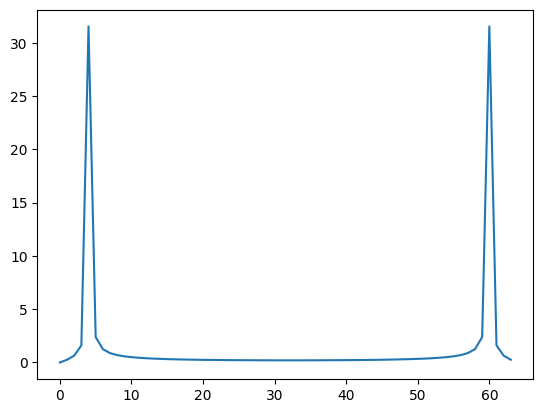

In [161]:
plt.plot( xM );

In [162]:
np.max( xM )

31.531318875445645

На графике видно два пика, которые и соответствуют гармонике. Они симметричны относительно центра.

<font color='red'>С точки зрения питона, мы можем отловить эти точки, запросив значения массива более 24 и используя функцию where</font>

In [163]:
xG = xM > 24
xG

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [164]:
np.where( xG )

(array([ 4, 60]),)

<font color='red'>Поделим точки пиков на длину массива, получим красивые числа</font>

In [165]:
4/64, 64 - 4
# Доля и то что 60 это 4 симметрично относительно центра.

(0.0625, 60)

In [166]:
xG[4], xG[-4]

(True, True)

<font color='red'>Мы эмпирически видим, что цифра 4 и с начала и с конца массива соответствует месту, где находится пик.</font>

Повысим частоту синусоиды в два раза.

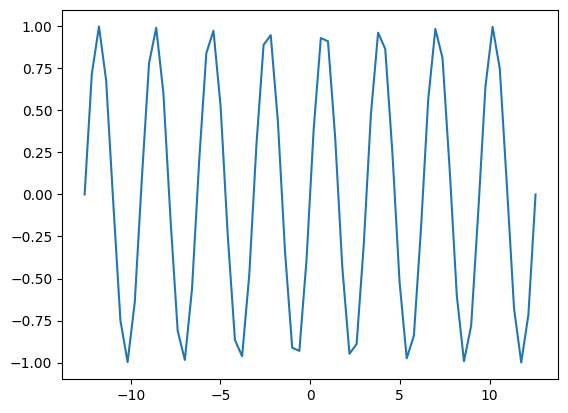

In [167]:
a2 = np.sin( 2*x )
plt.plot( x, a2);

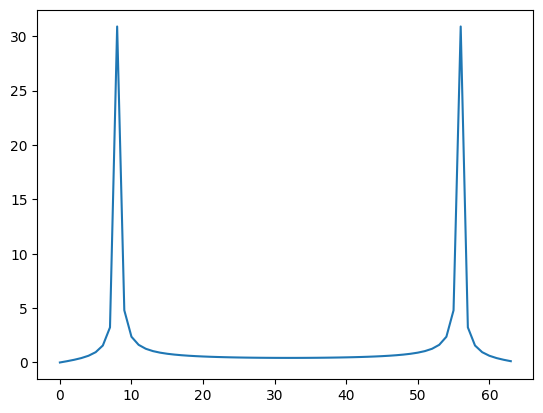

In [168]:
xF = np.fft.fft( a2 )
xM = np.abs( xF )
plt.plot( xM );

In [169]:
xG = xM > 24

In [170]:
np.where( xG )

(array([ 8, 56]),)

Видим, что при повышении частоты в два раза индекс максимума сместился тоже в два раза.

<font color='red'>Проверим, где будут находится пики в разных случаех и выведем формулу их положения. </font>

Проверим что будет при k(=3).

In [171]:
k = 5#3
ak = np.sin( k*x )
xF = np.fft.fft( ak )
xM = np.abs( xF )
xG = xM > 24
xW = np.where( xG )[0]
xW

array([20, 44])

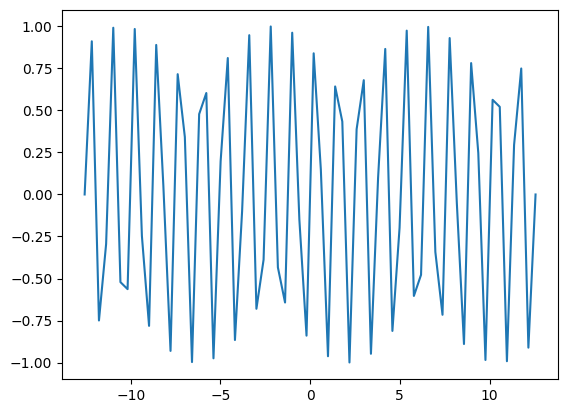

In [172]:
plt.plot( x, ak);

<font color='red'>Формула для нахождения координат пиков в случае простой синусоиды выглядит так. k - частота синусоиды</font>

In [173]:
xW[0]/k, (len(xG) - xW[1])/k

(4.0, 4.0)

Получили инвариант. Если индекс поделить на 4 то получим частоту.

<b>Смесь гармоник</b>

Покажем, что гармоники не мешают друг другу.

Сумма двух отличных гармоник.

In [174]:
#a = np.sin( x ) + np.sin( 5*x )
a = np.sin( 2*x ) + np.sin( 3*x )

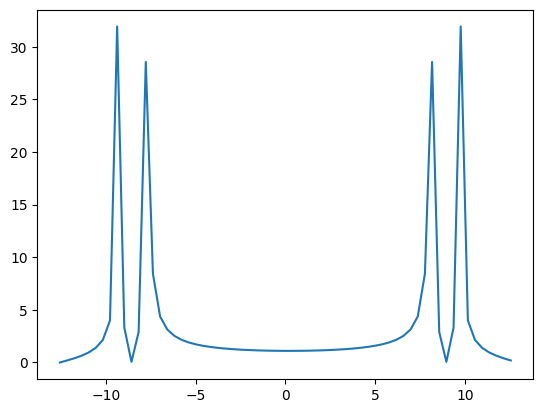

In [175]:
xF = np.fft.fft( a )
xM = np.abs( xF )
plt.plot( x, xM);

<font color='red'>Поскольку преобразование фурье аддитивно, то преобразование суммы равно сумму преобразований</font>

<font color='red'> Это свойство данного преобразования, благодаря ему здесь появятся 4 пика </font>

In [176]:
xG = xM > 24
xW = np.where( xG )[0]
xW

array([ 8, 12, 52, 56])

<font color='red'> Используя такую же формулу, но изначально зная, где пики находятся, можно вычислить гармоники, из которых состоял первоначальный сигнал. </font>

<font color='red'> Посчитаем сколько периодов пи в массиве.</font>

In [177]:
(x[-1] - x[0])/(2*np.pi)

4.0

Вспоминаем формулу.

In [65]:
xW/4 # 4 это длина отрезка в 2пи.

array([ 2.,  3., 13., 14.])

Видно, что гармоники восстанавливаются.

<font color='red'> Можно поиграться, поменять значения выше на свое усмотрение, и, если все сработает, то вы сможете увидеть, суммой каких гармоник был ваш сигнал</font>

<h3>Свойство сдвига</h3>

<font color='red'> Первое свойство преобразования, что мы можем извлечь те синусоиды, из которых он состоит, независимо друг от друга. Пусть мы имеем какой-либо массив. Вполне нормальная задача, с точки зрения преобразования. У нас также имеется другой массив и нам надо убедиться, что один массив является сдвигом другого массива. Наивный алгоритм нам говорит о том, что нам надо постоянно сдвигать один массив на единицу и постоянно сравнивать - совпадают или не совпадают. Это очень долго. Через преобразования это можно сделать гораздо быстрее.</font>

<font color='red'> Сконструировали 2 массива. Применим к ним преобразование. Это как элемент задачи преобразования окон??. Сигнал, например, кошка. Кошка сдвинутая на 2 пикселя - все та же кошка. Т.е распознавание сигнала не должно зависеть от того, что сигнал как-то сдвинут. Он должен правильно определяться независимо от сдвига.</font>

In [66]:
x = list(range(1, 9, 1))
x

[1, 2, 3, 4, 5, 6, 7, 8]

In [67]:
len(x)

8

Сдвинем x на один элемент.

In [68]:
xs = x[1:] + [x[0]]
xs

[2, 3, 4, 5, 6, 7, 8, 1]

<font color='red'> Таким образом, у нас 2 сигнала. Один сдвинут относительно другого. Преобразование поможет нам решить задачу распознавания. </font>

<font color='red'> Берем преобразование от исходного сигнала</font>

In [69]:
cx = np.fft.fft( x )
cx

array([36.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

<font color='red'> И преобразование от сигнала сдвинутого</font>

In [70]:
cxs = np.fft.fft( xs )
cxs

array([36.        +0.j, -9.65685425+4.j, -4.        -4.j,  1.65685425-4.j,
        4.        +0.j,  1.65685425+4.j, -4.        +4.j, -9.65685425-4.j])

<font color='red'> ока что в этих преобразованиях ничего интересного не видно. Совпадают только первые числа, последующие - нет, пока непонятно в чем логика</font>

<font color='red'> Теперь возьмем абсолютную величину - магнитуду обоих преобразований</font>

Вычислим магнитуду.

In [71]:
cxM = np.abs( cx )
cxM

array([36.        , 10.45250372,  5.65685425,  4.3295688 ,  4.        ,
        4.3295688 ,  5.65685425, 10.45250372])

In [72]:
cxsM = np.abs( cxs )
cxsM

array([36.        , 10.45250372,  5.65685425,  4.3295688 ,  4.        ,
        4.3295688 ,  5.65685425, 10.45250372])

Видно, что массивы совпадают.

<font color='red'> Т.е для сопоставления сигналов не обязательно сдвигать их относительно друг друга. Достаточно проверить и сравнить их магнитуды. У одного и того же сигнала она будет одинаковой несмотря на сдвиг. Нужно, конечно, не забывать про машинный эпсилон и другие особенности машинного исчисления, которые не будут работать на синтезированных нами данных, а в реальной жизни должны учитываться</font>

In [73]:
np.alltrue( cxM == cxsM )

True

In [74]:
np.allclose( cxM, cxsM )

True

т.е. абсолютное значение фурье преобразование не зависит от сдвига массива.

Как вычислить величину сдвига?

<font color='red'> Можно ли понять величину сдвига, используя преобразования? Да, можно, надо разделить два преобразованных сигнала друг на друга (сдвинутый на оригинальный)</font>

In [75]:
# Вычислим отношение
cxA = cxs/cx
cxA

array([ 1.        +0.j        ,  0.70710678+0.70710678j,
       -0.        +1.j        , -0.70710678+0.70710678j,
       -1.        -0.j        , -0.70710678-0.70710678j,
       -0.        -1.j        ,  0.70710678-0.70710678j])

<font color='red'> Пока что получили непонятный набор чисел, на котором сдвиг не увидим. Но это отношение двух сигналов. </font>

Выведем эти точки на комплексную плоскость.

In [76]:
cxA.real

array([ 1.        ,  0.70710678, -0.        , -0.70710678, -1.        ,
       -0.70710678, -0.        ,  0.70710678])

In [77]:
cxA.imag

array([ 0.        ,  0.70710678,  1.        ,  0.70710678, -0.        ,
       -0.70710678, -1.        , -0.70710678])

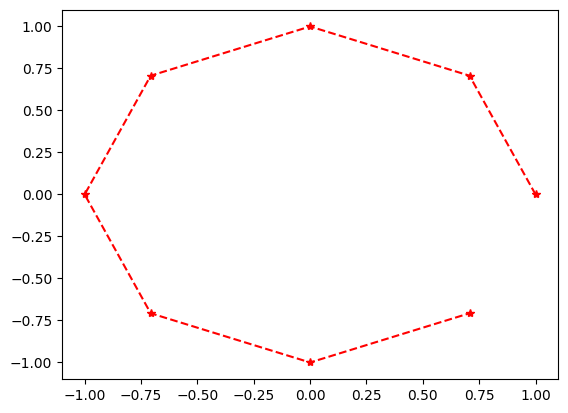

In [78]:
plt.plot( cxA.real, cxA.imag, "r*--");

Видим, что точки по кругу.

In [79]:
cxA[0]

(1+0j)

In [80]:
q1 = np.angle( cxA[1] )
q1

0.7853981633974482

<font color='red'> Повторяющийся угол является первым элементом отношения двух сигналов. Мы могли, конечно, делить массивы поэлементно, каждый на каждого. Давайте попробуем сдвинуть массив еще на один элемент и посмотрим как поменяется это отношение cxA</font>

Сдвиним ещё.

In [81]:
xs = xs[1:] + [xs[0]]
xs

[3, 4, 5, 6, 7, 8, 1, 2]

In [82]:
cxs = np.fft.fft( xs )

In [83]:
cxsM = np.abs( cxs )

In [84]:
np.allclose( cxM, cxsM )

True

<font color='red'> Магнитуды сигналов не изменились, посмотрим что нам даст отношение двух сигналов</font>

In [85]:
cxA = cxs/cx
cxA

array([ 1.+0.j,  0.+1.j, -1.-0.j, -0.-1.j,  1.-0.j, -0.+1.j, -1.-0.j,
       -0.-1.j])

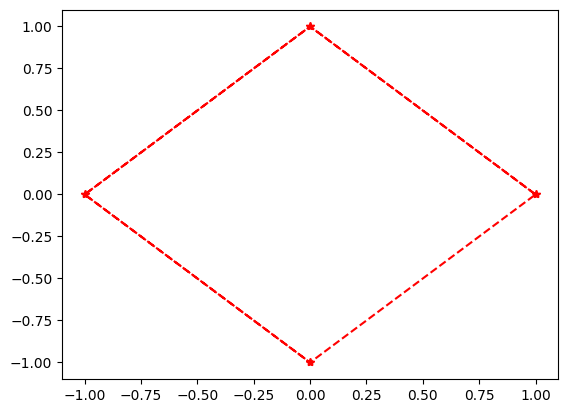

In [86]:
plt.plot( cxA.real, cxA.imag, "r*--");

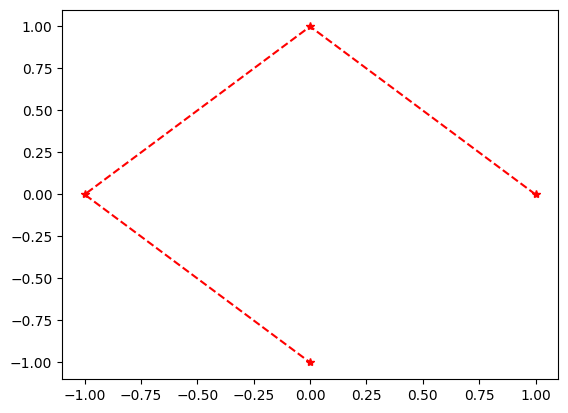

In [87]:
plt.plot( cxA[:4].real, cxA[:4].imag, "r*--");

Видно что обходит круг два раза.

Смещение массива вычисляется по формуле:

In [88]:
q2 = np.angle( cxA[1] )
q2 # Это ответ в углах.

1.5707963267948966

<font color='red'> Видим, что величина угла изменилась после увеличения сдвига. Чтобы проверить сдвиг не в углах, а с точки зрения элементов массива, то можно использовать эту формулу</font>

<font color='red'> Этот угол называется углом комплексного числа</font>

In [89]:
8 * np.array( [q1, q2] )/(2*np.pi) # 4*
# А это ответ в количестве элементов.

array([1., 2.])

т.е. мы можем вычислить величину сдвига.
Тогда, сначала проверяем, что объект является сдвинутым.
если мы знаем, что объект сдвинут.

In [90]:
#(np.angle( cxs/cx ) + 2*np.pi)%(2*np.pi)

<font color='red'> Ниже быстрый пример преобразования для сдвига на 3 элемента массива</font>

In [91]:
xs = x[3:] + x[:3]
cxs = np.fft.fft( xs )
cxA = cxs/cx
8*np.angle( cxA[1] )/(2*np.pi)

3.0

<b>Двумерный случай</b>

<font color='red'>Проделаем то же самое для двумерного случая. </font>

Рассмотрим (двумерную) матрицу.

In [92]:
rr = np.array([[1,2,3], [-4,-3,-2], [-5,-3,5]])
rr

array([[ 1,  2,  3],
       [-4, -3, -2],
       [-5, -3,  5]])

<font color='red'> Двумерный случай требует одномерного преобразованичя вдоль одной оси, затем двумерного преобразвоания вдоль другой оси. В целом процесс аналогичен одномерному случаю</font>

Сдвиним все строчки на один.

In [93]:
rrs = np.roll( rr, shift = 1, axis = 0)
rrs

array([[-5, -3,  5],
       [ 1,  2,  3],
       [-4, -3, -2]])

Вычислим фурье преобразование от обеих матрицах.

In [94]:
crr = np.fft.fft2( rr )
crrs = np.fft.fft2( rrs )

<font color='red'> Возьмем отношение двух сигналов</font>

In [95]:
crrA = crrs/crr
crrA

array([[ 1. -0.j       ,  1. -0.j       ,  1. -0.j       ],
       [-0.5-0.8660254j, -0.5-0.8660254j, -0.5-0.8660254j],
       [-0.5+0.8660254j, -0.5+0.8660254j, -0.5+0.8660254j]])

In [96]:
# Все столбцы одинаковые
crrA[:,0]

array([ 1. -0.j       , -0.5-0.8660254j, -0.5+0.8660254j])

<font color='red'> Каждый столбец сдвинулся на одно значение, поэтому отношение двух столбцов тоже будет совпадать. А преобразования тоже будут идти в ногу.</font>

<font color='red'> Проверим, что магнитуды преобразований одинаковы.</font>

In [97]:
np.allclose( crrA[:,0], crrA[:,1] )

True

In [98]:
np.allclose( crrA[:,0], crrA[:,2] )

True

Вычислим смещение по ранее провереной формуле.

<font color='red'> Поскольку смещение проводилось на одинаковые значения по столбцам, то можно взять первый элемет любого столбца для определения сдвига.</font>

In [99]:
ang = np.angle( crrA[1,0] )
ang

-2.0943951023931957

In [100]:
3*ang/(2*np.pi)
# т.е. на один элемент

-1.0000000000000002

<font color='red'> Таким образом, каждый столбец сдвинулся в обратную сторону на один элемент</font>

одна треть. и именно вдоль одной из осей.

<h2>Перейдем к изображению</h2>

<font color='red'> Переходим к практике, для начала я просто показываю как Фурье преобразование применить к изображению и какие здесь есть нюансы. Во-первых здесь больше пикселей, а во-вторых надо уметь отображать фурье-преобразование изображения, для чего существуют общепринятые подходы</font>

<font color='red'> Для начала скачиваю изобрадение и преобразую его в плавающие точки. Это важно, т.к фурье преобразование работает только с плавающей точкой. </font>

In [101]:
lena = cv.imread( "./data/lena512color.tiff")
lena = cv.cvtColor( lena, cv.COLOR_BGR2GRAY)
lena = np.float64( lena )
lena.shape, lena.dtype

((512, 512), dtype('float64'))

<font color='red'> трансформация во float преобразует цветовое пространство. Это делается для того, что функция plt.show правильно отобразила картинку.</font>

<font color='red'> Когда мы работаем с изображениями, мы преобразовываем цветные изображения в тона серого, так принято. В принципе, можно фурье-преобразование применять к каждой компоненте изображения по отдельности, но пока поработаем как принято</font>

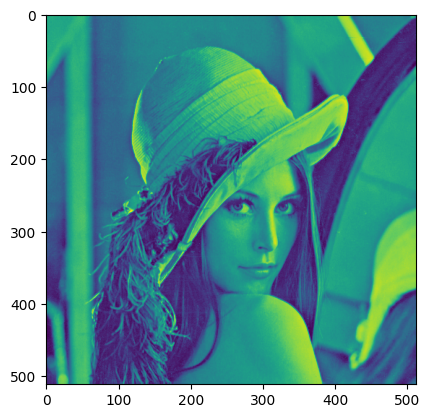

In [102]:
plt.imshow( lena );

<h3>Фурье преобразование от изображения</h3>

<b>Фурье область</b>

<font color='red'> Теперь применяем фурье-преобразование. У OpenCV такая функция вроде бы есть, но в данном случае применим функционал numpy.</font>

<font color='red'> Напомню, что считанное изображение является лишь матрицей соответствующего размера, поэтому изученные нами ранее методы к ним также применимы</font>

In [103]:
flena = np.fft.fft2( lena )
flena.shape, flena.dtype

((512, 512), dtype('complex128'))

Массив соразмерен изображению, но имеет тип комплексного числа. Поэтому мы не может из отобразить как картинку.
Для этого можно например взять магнитуду кадого из комплексных чисел.

Вычислим магнитуду изображения.

In [104]:
mag = np.abs( flena )
mag.shape

(512, 512)

In [105]:
np.max(mag), np.min(mag), mag.dtype

(32518586.0, 1.806356024857675, dtype('float64'))

<font color='red'>Видим, что максимальное значение очень большое, а минимальное значение достаточно малое, т.е чистоты изображения занимают очень большой диапазон. </font>

In [106]:
np.max( mag ) / np.min( mag )

18002312.69611547

<font color='red'>Увидеть магнитуду изображения на экране практически невозможно, как мы видим ниже. Imshow подстраивается под максимальное число изображения (np.max(mag)) и делит на него все значения изображения</font>

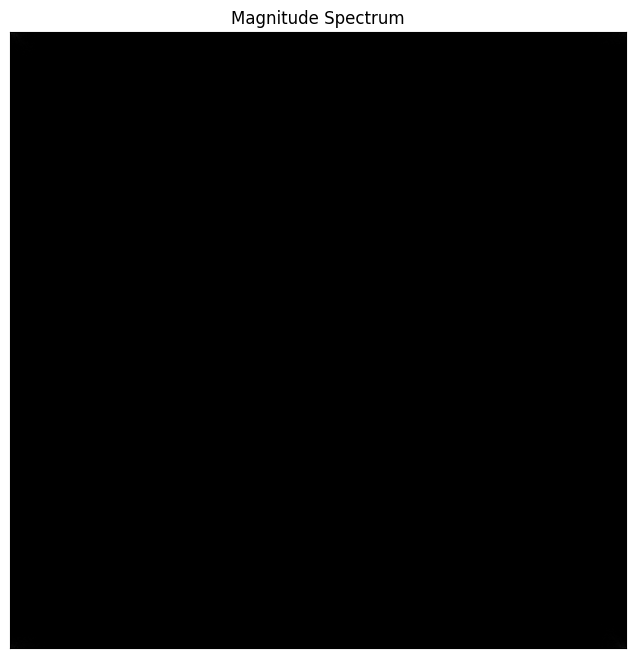

In [107]:
plt.figure( figsize = (8,8) )
plt.imshow( mag, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

<font color='red'>Чтобы увидеть эту магнитуду, сделаем преобразование вручную, умножим на некий коэффициент и преобразуем в unit8. Мы вручную подогнали числа, чтобы получившееся максимальное число вписывалось в numpy, преобразовали в 8-бит число.</font>

In [108]:
np.max((200.*mag/32000000.))

203.2411625

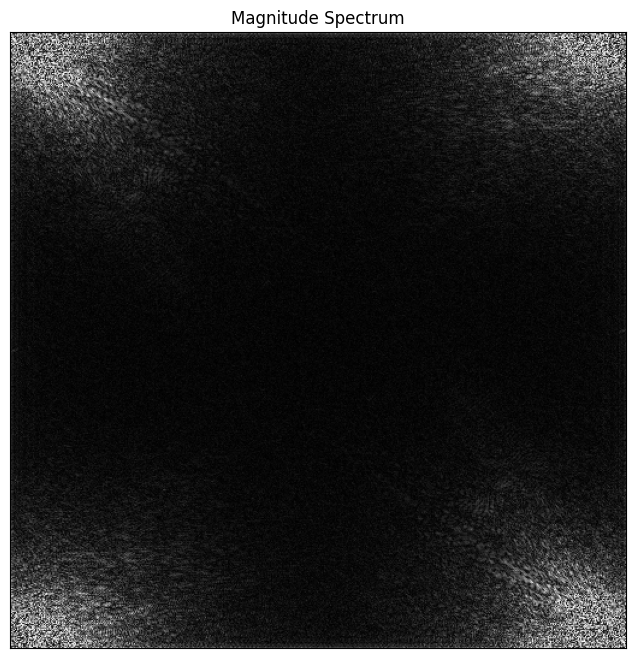

In [109]:
plt.figure( figsize = (8,8) )
plt.imshow( (200000.*mag/32000000.).astype('uint8'), cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

<font color='red'>Все равно не очень, но уже лучше. </font>

Чего то изображения не видно. Все черное.
Проверим какой диапазон значений.

In [110]:
np.max( mag ), np.min( mag ), np.mean( mag )

(32518586.0, 1.806356024857675, 5316.041717857328)

Видим, что максимальное значение очень очень большое.
Более того, порядок очень чисел сильно разный (среднее сильно меньше максимума).

<font color='red'>Построим гистограмму распределения или плотность частот изображения. Используем функцию gaussian_kde</font>

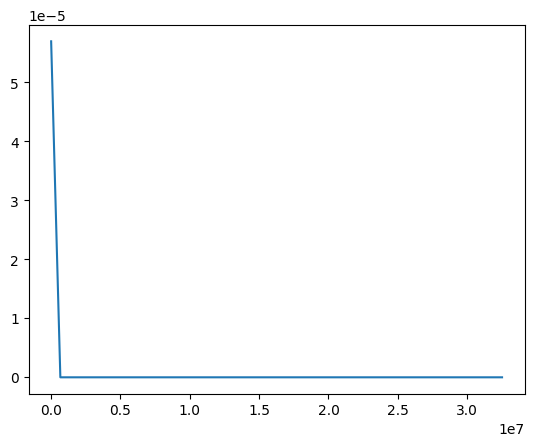

In [111]:
sm = stats.gaussian_kde( mag.flatten() )
val = np.linspace( 0, np.max( mag ), 50)
plt.plot( val, sm( val ) );

<font color='red'>Видно, что плотность сконцентрирована в нуле. В таком случае стоит логарифмировать</font>

Выполним логарифмирование.

In [112]:
lmag = np.log( mag )

<font color='red'>Также возьмем максимальное и минимальное число, а также вычислим их отношение</font>

In [113]:
np.max( lmag ), np.min( lmag ), np.mean( lmag )

(17.29732236076375, 0.5913115700390351, 7.72147385443207)

In [114]:
np.max( lmag ) / np.min( lmag )

29.252467289997178

<font color='red'>Оно стало значительно меньше. Чуть чуть подправим формулу и посмотрим распределение для логарифмированного сигнала</font>

In [115]:
255/np.max( lmag )

14.742166138871719

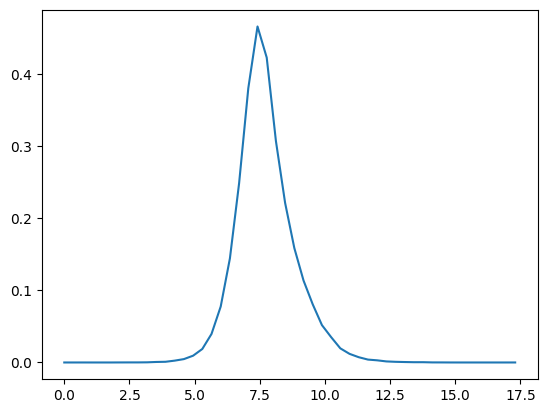

In [116]:
sm = stats.gaussian_kde( lmag.flatten() )
val = np.linspace( 0, np.max( lmag ), 50)
plt.plot( val, sm( val ) );

In [117]:
<font color='red'>Уже похоже на гауссовское или нормальное распределение</font>

SyntaxError: invalid syntax (1016167686.py, line 1)

Принято умножать на 20.

<font color='red'>Распределение не изменится</font>

In [118]:
lmag = 20. * np.log( mag )
np.max( lmag ), np.min( lmag ), np.mean( lmag )

(345.94644721527504, 11.826231400780703, 154.4294770886414)

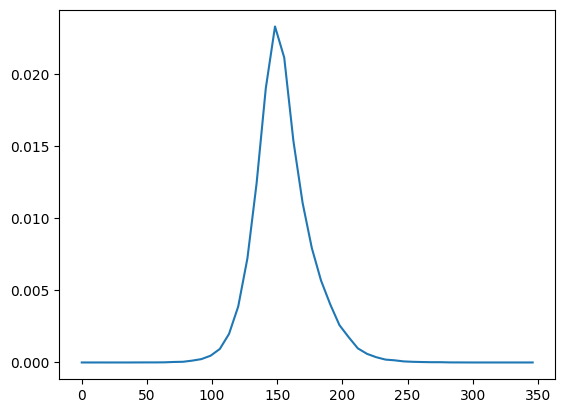

In [119]:
sm = stats.gaussian_kde( lmag.flatten() )
val = np.linspace( 0, np.max( lmag ), 50)
plt.plot( val, sm( val ) );

Уже можно оторазить как картинку.

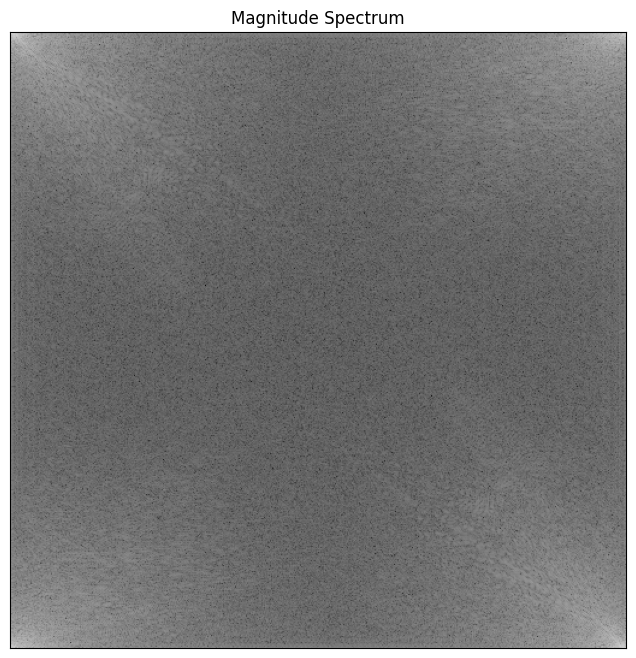

In [120]:
plt.figure( figsize = (8,8) )
plt.imshow( lmag, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

<font color='red'>Картинка стала выглядеть гораздо лучше. Здесь нет черного центра, а все изображение покрыто пикселями. Это уже хорошо.</font>

<font color='red'>Второе. Светлые области, которые уходят куда-то в углы изображения. Нам важно выполнить сдвиг центра этого фурье-преобразования и сдвинуть один из этих углов (крайних точек) в центр.</font>

Хорошо, но частоты расположены нестандартно.

<b>Красивое отображение</b>

Сдвинем основную частоту в центр.

<font color='red'>Для сдвига фурье-преобразования есть функция fftshift (т.е сдвиг фурье-преобразования). Она помещает углы в центр изображения</font>

In [121]:
fslena = np.fft.fftshift( flena )

<font color='red'>Далее заново проделываем прошлые манипуляции, логарифмирование и посмотрим на полученное изображение. </font>

In [122]:
smag = np.abs( fslena )
lsmag = 20*np.log( smag )

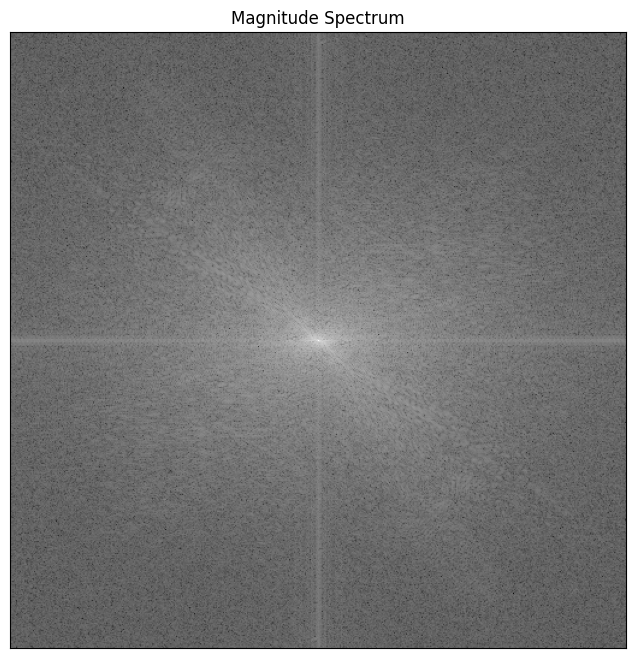

In [123]:
plt.figure( figsize = (8,8) )
plt.imshow( lsmag, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

<font color='red'>Выглядит приятнеее. Важные частоты теперь будут в центре. Это самая важная часть изображения.</font>

<font color='red'>Как понять где важные, а где неважные частоты? Мы можем вычислить квантиль, который позволит нам отбросить часть ненужной информации. Далее подбор квантиля для отброса 1% хвостов. Совсем малую энергию округлили.</font>

Можно отбросить 1% хвостов.

In [124]:
np.mean( lsmag < 100 ), np.mean( lsmag > 226 )

(0.00528717041015625, 0.005008697509765625)

In [125]:
lsmag[ lsmag < 100 ] = 100
lsmag[ lsmag > 226 ] = 226

<font color='red'>Это наше изображение с 1% отброшенной информации. </font>

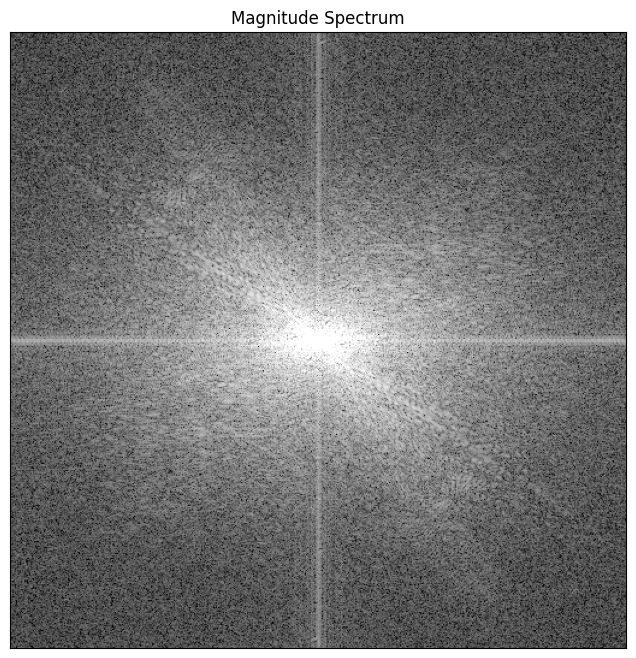

In [126]:
plt.figure( figsize = (8,8) )
plt.imshow( lsmag, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

<b>Обратимость преобразования</b>

<font color='red'>Важная часть! Фурье-преобразование обратимо! Для этого есть функция ifft2.</font>

<font color='red'>Напоминание: Фурье-преобразование работает с комплексными числами, следовательно - обратное преобразование также требует обратных чисел</font>

In [127]:
lena2 = np.fft.ifft2( flena )
lena2.shape, lena2.dtype

((512, 512), dtype('complex128'))

Посмотрим на угол комплексного числа.

In [128]:
angs = np.angle( lena2 )
angs.shape, angs.dtype

((512, 512), dtype('float64'))

In [129]:
np.max( angs ), np.min( angs )

(1.5027525457615394e-15, -1.2499317576409316e-15)

<font color='red'>В этих числах комплексная составляющая практически равна машинному эпсилон, поэтому мы можем ее отбросить</font>

Видим, что эти комплексные числа фактически являются действительными.
Поэтому спокойно преобразуем их в дествительные. Например, найдя модуль.

In [130]:
lena2 = np.abs( lena2 )
lena2.shape, lena2.dtype

((512, 512), dtype('float64'))

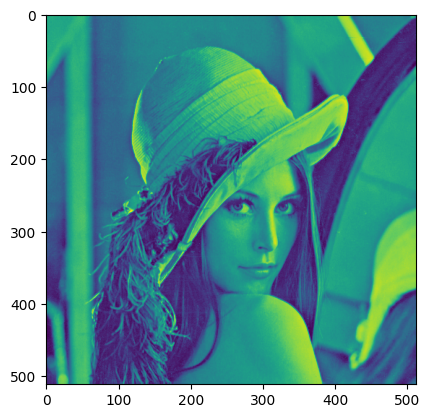

In [131]:
plt.imshow( lena2 );

<font color='red'>Таким образом, мы получили обратно исходное изображение</font>

Найдем разницу с исходным изображением.

In [132]:
dlena = np.abs(lena2-lena)

In [133]:
np.max( dlena )

5.684341886080802e-14

Очень маленькая разница. Уровень машинного эпсилон.

In [134]:
np.allclose( lena, lena2 )

True

<b>Важность компонент</b>

<font color='red'>Как понять какие компоненты являются важными в фурье преобразовании? </font>

Загрузим ещё одно известное изображения в области цифровой обработке изображений.

In [135]:
barb = cv.imread( "./data/barbara.png")
barb = cv.cvtColor( barb, cv.COLOR_BGR2GRAY)
barb = np.float64( barb )
barb.shape, barb.dtype

((512, 512), dtype('float64'))

<font color='red'>У нас есть амплитудная и фазовая величина в фурье-преобразовании. Магнитудная - абсолютная величина, фазовая - значение комплексного угла</font>

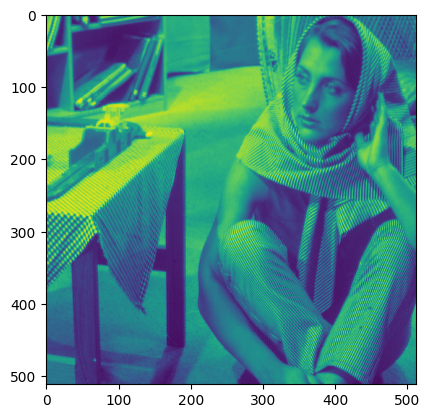

In [136]:
plt.imshow( barb );

Возьмем фурье преобразование от изображения Барбары.

In [137]:
fbarb = np.fft.fft2( barb )
fbarb.shape, fbarb.dtype

((512, 512), dtype('complex128'))

<font color='red'>Далее сделаем интересную вещь. Получив составляющие от изображений Лены и Барбары ,поменяем их местами. Мы хотим эмпирически понять, какая из составляющих Фурье-преобразования важнее: магнитудная или фазовая.</font>

Извлечем фазу и магнитуду комплексных чисел, т.е. фурье коэффициентов.

In [138]:
alena = np.angle( flena )
mlena = np.abs( flena )

In [139]:
abarb = np.angle( fbarb )
mbarb = np.abs( fbarb )

Напишем функцию обратного преобразования: по полярным координатам создает комплексное число.

In [140]:
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

Скомбинируем магнитуду и фазу в разных комбинациях.

Магнитуда и фаза от Лены.

In [141]:
fflena = P2R( mlena, alena )

In [142]:
lena2 = np.fft.ifft2( fflena )
lena2.shape, lena2.dtype

((512, 512), dtype('complex128'))

In [143]:
np.max( np.angle(lena2) )

1.383653850942273e-15

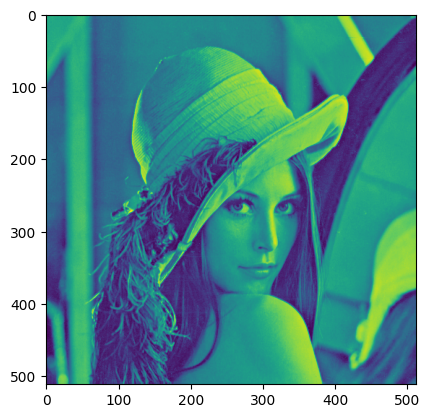

In [144]:
lena2 = np.abs( lena2 )
plt.imshow( lena2 );

Получили изображение Лены как и положено.

Магнитуда от Лены, а фаза от Барбары.

In [145]:
ffbarbl = P2R( mlena, abarb )

In [146]:
barb2l = np.fft.ifft2( ffbarbl )
barb2l.shape, barb2l.dtype

((512, 512), dtype('complex128'))

In [147]:
np.max( np.angle(barb2l) )

3.141592653589793

In [148]:
barb2l = np.abs( barb2l )

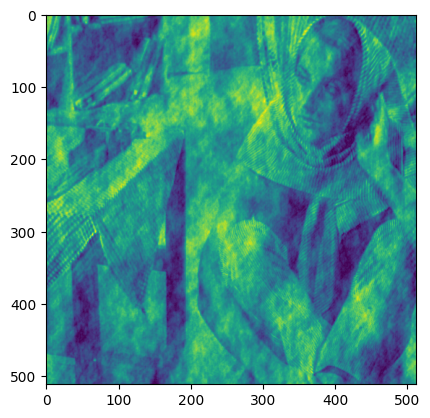

In [149]:
plt.imshow( barb2l );

и наоборот: магнитуда от Барбары и фаза от Лены.

In [150]:
fflenab = P2R( mbarb, alena )

In [151]:
lena2b = np.fft.ifft2( fflenab )
lena2b.shape, lena2b.dtype

((512, 512), dtype('complex128'))

In [152]:
np.max( np.angle(lena2b) )

3.141592653589793

In [153]:
lena2b = np.abs( lena2b )

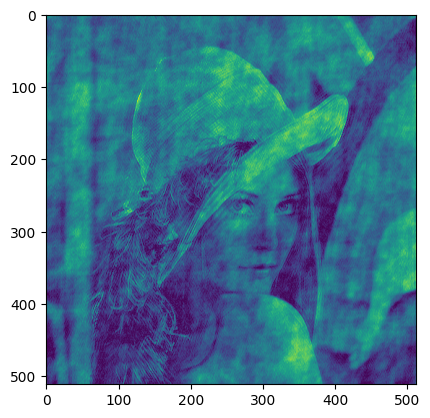

In [154]:
plt.imshow( lena2b );

Итого. Для визуального восприятия гланым является фаза.